In [1]:
%run -i run_MDTVSFA.py
import os
home_dir = disk_dir_R + "tonemap/"
os.system('mkdir ' +home_dir)
os.system('mkdir ' +home_dir +  'VMAF_METRIX')
os.system('mkdir ' +home_dir +  'VMAF_METRIX/csv_res')
os.system('mkdir ' +home_dir +  'VMAF_METRIX/vid')

dst_dir = "P://7videos/" 
env = calc_met( model = "MDTVSFA", home_dir1=home_dir,dataset_dir=dst_dir)
all_method_name = ["gamma_unsharp", "CLAHE", "Tonemap_Drago", "Identity"]
all_func = [aug4const, expose_cv2, tonemapDrago, Identity]
args_d_Identity = args_d_CLAHE
all_argd = [args_d_aug4const, args_d_CLAHE, args_tonemapDrago, args_d_Identity]
SSIM_m = env.SSIM_metrix_get
PSNR_m = env.PSNR_metrix_get
all_proxy_metr = [SSIM_m, PSNR_m]
all_proxy_names = ["SSIM", "PSNR"]
exec(open('Current_model_lib.py').read())
met_name = "Linearity"
target_lst = [met_name]
k_lst = [1]
loss_calc = Custom_enh_Loss(target_lst = target_lst, k_lst=k_lst, to_train = False)
loss_calc = loss_calc.eval()
met_names = ["MDTVSFA", "Linearity", "SPAQ", "VSFA", "PAC2PIQ", "NIMA", "KONIQ"]
met_name = None

In [2]:
#Universal
def get_met(X):
    global tmp
    tmp = X
    if met_name == "VSFA":
        return -loss_calc({"x_hat": torch.cat([X,X])}, torch.cat([X,X]))["loss"]
    else:
        return -loss_calc({"x_hat": X}, X)["loss"]
    
for met_name in met_names:
    print(met_name)
    target_lst = [met_name]
    k_lst = [1]
    loss_calc = Custom_enh_Loss(target_lst = target_lst, k_lst=k_lst, to_train = False)
    loss_calc.eval()
    loss_calc.get_met = get_met
    AV_log = []
    AV_av = []
    random.seed(a = 431)
    env.metr = get_met#
    toolbox = base.Toolbox()
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
    creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)
    toolbox.register("individual", init_range, creator.Individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalOneMax)
    toolbox.register("mate", cxTwoPointCopy)
    toolbox.register("mutate", mut_cutom, indpb=1.)
    toolbox.register("select", tools.selNSGA2)
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
    creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

    for idx_proxy, idx_f  in tqdm(list(itertools.product(range(len(all_proxy_metr)), range(len(all_func))))):
        
        cur_proxy = all_proxy_metr[idx_proxy]
        cur_proxy_name = all_proxy_names[idx_proxy]
        cur_method_name, cur_func, cur_argd = list(zip(all_method_name, all_func, all_argd))[idx_f] 
        args_d = cur_argd
        print(cur_method_name + ", no codec tuning for "+ met_name + "_" + cur_proxy_name +", NSGA2")
        #calculate_flag = #(met_name == "PAC2PIQ" and cur_method_name == "Identity")  or \
        calculate_flag = (met_name == "KONIQ" and cur_method_name == "CLAHE") or \
            (met_name == "KONIQ" and cur_method_name == "Tonemap_Drago" and cur_proxy_name == "PSNR") 
        if not calculate_flag:
            continue
        else:
            print("FFF32ZZZ")
        env.func = axis_swaper(cur_func)
        env.PSNR_metrix_get = cur_proxy
        stats = None
        AV_log = []
        AV_av = []
        env.codec = None
        for vid in tqdm(sorted(os.listdir(dst_dir))):
            pop = toolbox.population(n=28)
            env.dataset = [vid]
            env.init_video()
            if cur_method_name == "Identity":
                ngen = 1
                mu = 1
                lambda_ = 1
            else:
                ngen = 11
                mu = 14
                lambda_ = 17
            pop, logbook,statsmy = My_eaMuPlusLambda(pop, toolbox ,mu = mu,lambda_ = lambda_, cxpb=0.5, mutpb=0.49, ngen=ngen, stats=stats)
            AV_log.append(logbook)
            with open(disk_dir + 'VMAF_METRIX/NeuralNetworkCompression/logs_black_box/' + met_name + "_" + cur_proxy_name + "_" + cur_method_name + ".npy" , 'wb') as f:
                np.save(f, np.array(AV_log))

MDTVSFA


C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


  0%|          | 0/8 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for MDTVSFA_SSIM, NSGA2
CLAHE, no codec tuning for MDTVSFA_SSIM, NSGA2
Tonemap_Drago, no codec tuning for MDTVSFA_SSIM, NSGA2
Identity, no codec tuning for MDTVSFA_SSIM, NSGA2
gamma_unsharp, no codec tuning for MDTVSFA_PSNR, NSGA2
CLAHE, no codec tuning for MDTVSFA_PSNR, NSGA2
Tonemap_Drago, no codec tuning for MDTVSFA_PSNR, NSGA2
Identity, no codec tuning for MDTVSFA_PSNR, NSGA2
Linearity


  0%|          | 0/8 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for Linearity_SSIM, NSGA2
CLAHE, no codec tuning for Linearity_SSIM, NSGA2
Tonemap_Drago, no codec tuning for Linearity_SSIM, NSGA2
Identity, no codec tuning for Linearity_SSIM, NSGA2
gamma_unsharp, no codec tuning for Linearity_PSNR, NSGA2
CLAHE, no codec tuning for Linearity_PSNR, NSGA2
Tonemap_Drago, no codec tuning for Linearity_PSNR, NSGA2
Identity, no codec tuning for Linearity_PSNR, NSGA2
SPAQ


  0%|          | 0/8 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for SPAQ_SSIM, NSGA2
CLAHE, no codec tuning for SPAQ_SSIM, NSGA2
Tonemap_Drago, no codec tuning for SPAQ_SSIM, NSGA2
Identity, no codec tuning for SPAQ_SSIM, NSGA2
gamma_unsharp, no codec tuning for SPAQ_PSNR, NSGA2
CLAHE, no codec tuning for SPAQ_PSNR, NSGA2
Tonemap_Drago, no codec tuning for SPAQ_PSNR, NSGA2
Identity, no codec tuning for SPAQ_PSNR, NSGA2
VSFA


  0%|          | 0/8 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for VSFA_SSIM, NSGA2
CLAHE, no codec tuning for VSFA_SSIM, NSGA2
Tonemap_Drago, no codec tuning for VSFA_SSIM, NSGA2
Identity, no codec tuning for VSFA_SSIM, NSGA2
gamma_unsharp, no codec tuning for VSFA_PSNR, NSGA2
CLAHE, no codec tuning for VSFA_PSNR, NSGA2
Tonemap_Drago, no codec tuning for VSFA_PSNR, NSGA2
Identity, no codec tuning for VSFA_PSNR, NSGA2
PAC2PIQ


  0%|          | 0/8 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for PAC2PIQ_SSIM, NSGA2
CLAHE, no codec tuning for PAC2PIQ_SSIM, NSGA2
Tonemap_Drago, no codec tuning for PAC2PIQ_SSIM, NSGA2
Identity, no codec tuning for PAC2PIQ_SSIM, NSGA2
gamma_unsharp, no codec tuning for PAC2PIQ_PSNR, NSGA2
CLAHE, no codec tuning for PAC2PIQ_PSNR, NSGA2
Tonemap_Drago, no codec tuning for PAC2PIQ_PSNR, NSGA2
Identity, no codec tuning for PAC2PIQ_PSNR, NSGA2
NIMA


  0%|          | 0/8 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for NIMA_SSIM, NSGA2
CLAHE, no codec tuning for NIMA_SSIM, NSGA2
Tonemap_Drago, no codec tuning for NIMA_SSIM, NSGA2
Identity, no codec tuning for NIMA_SSIM, NSGA2
gamma_unsharp, no codec tuning for NIMA_PSNR, NSGA2
CLAHE, no codec tuning for NIMA_PSNR, NSGA2
Tonemap_Drago, no codec tuning for NIMA_PSNR, NSGA2
Identity, no codec tuning for NIMA_PSNR, NSGA2
KONIQ


  0%|          | 0/8 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for KONIQ_SSIM, NSGA2
CLAHE, no codec tuning for KONIQ_SSIM, NSGA2
FFF32ZZZ


  0%|          | 0/7 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


GEN:1  -127.91584777832031 -28.05459779308688 0
GEN:2  -127.33667755126953 -25.31399868380639 0
GEN:3  -127.33667755126953 -31.121356348837576 0
GEN:4  -127.33667755126953 -35.26130996211882 0
GEN:5  -127.33667755126953 -36.82017283285818 0
GEN:6  -127.33667755126953 -37.351621566280244 0
GEN:7  -127.33667755126953 -39.09998001590852 0
GEN:8  -127.33667755126953 -39.64204825124433 0
GEN:9  -114.57758331298828 -36.32440554711126 0
GEN:10  -114.57758331298828 -37.859598959645915 0
GEN:11  -114.03936004638672 -38.66499919276084 0
BEST IND: [array([15.25147036, 20.        ]), (-34.757057189941406, 0.28638550639152527), array([[[ 1.52514704e+01,  2.00000000e+01],
        [-3.47570572e+01,  2.86385506e-01]],

       [[ 1.03982684e+01,  1.00000000e-05],
        [-1.14039360e+02,  9.98910069e-01]],

       [[ 1.03982684e+01,  1.89489073e+01],
        [-4.04920273e+01,  3.20608735e-01]],

       [[ 1.52514704e+01,  5.91514372e+00],
        [-7.14598007e+01,  4.03696060e-01]],

       [[ 1.15657

<ipython-input-2-d53ff35a57c6>:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save(f, np.array(AV_log))


GEN:1  -96.3099136352539 -27.66906935168851 0
GEN:2  -96.3339614868164 -28.928436156242125 0
GEN:3  -96.3339614868164 -28.51768075266192 0
GEN:4  -96.3339614868164 -29.14780007639239 0
GEN:5  -96.3339614868164 -29.256817356232673 0
GEN:6  -96.3339614868164 -28.19731927687122 0
GEN:7  -96.3339614868164 -30.404515051072643 0
GEN:8  -98.16780853271484 -28.01730223624937 0
GEN:9  -98.43740844726562 -30.333126006587857 0
GEN:10  -98.9104995727539 -30.880548600227602 0
GEN:11  -98.9104995727539 -32.86247862538984 0
BEST IND: [array([48.78888585, 20.        ]), (-24.235666275024414, 0.14712505042552948), array([[[ 1.37892547e+01,  1.00000000e-05],
        [-9.89104996e+01,  6.40715837e-01]],

       [[ 1.32751265e+01,  1.00000000e-05],
        [-9.89104996e+01,  6.40715837e-01]],

       [[ 4.87888859e+01,  2.00000000e+01],
        [-2.42356663e+01,  1.47125050e-01]],

       [[ 1.86791655e+01,  1.74842720e+00],
        [-7.91054153e+01,  4.15584058e-01]],

       [[ 4.84753425e+01,  1.511182

GEN:11  -93.96499633789062 -19.256574261573054 0
BEST IND: [array([18.37027953, 20.        ]), (-24.861276626586914, 0.5020135641098022), array([[[ 1.83702795e+01,  2.00000000e+01],
        [-2.48612766e+01,  5.02013564e-01]],

       [[ 1.09517351e+00,  2.00000000e+01],
        [-9.39649963e+01,  1.12077892e+00]],

       [[ 1.09517351e+00,  3.66085637e-01],
        [-5.44143677e+01,  9.83520567e-01]],

       [[ 8.26241239e+01,  9.51333971e+00],
        [-3.18767109e+01,  8.78956318e-01]],

       [[ 1.09517351e+00,  3.66085637e-01],
        [-5.44143677e+01,  9.83520567e-01]],

       [[ 8.26241239e+01,  1.00000000e-05],
        [-4.29441338e+01,  8.91332209e-01]],

       [[ 2.97559498e+01,  1.00110223e+01],
        [-2.85844059e+01,  7.99994886e-01]],

       [[ 1.09517351e+00,  1.00000000e-05],
        [-4.72962112e+01,  9.82932091e-01]],

       [[ 3.76756722e+01,  1.01687403e+01],
        [-2.75088730e+01,  7.66637802e-01]],

       [[ 7.83577345e+00,  1.00000000e-05],
        

  0%|          | 0/7 [00:00<?, ?it/s]

GEN:1  -127.06080627441406 -38.610590042606475 0
GEN:2  -124.41617584228516 -38.253265134749874 0
GEN:3  -124.41617584228516 -39.49429308983587 0
GEN:4  -124.41617584228516 -40.328541048111454 0
GEN:5  -124.41617584228516 -40.319959086756555 0
GEN:6  -117.24876403808594 -33.018483192689956 0
GEN:7  -117.24876403808594 -32.79049141176285 0
GEN:8  -117.24876403808594 -35.423727589268836 0
GEN:9  -113.91525268554688 -35.939949773973034 0
GEN:10  -113.91525268554688 -35.219325404013354 0
GEN:11  -113.91525268554688 -35.151733152328 0
BEST IND: [array([15.88398672, 19.64387202]), (-34.992191314697266, 12.056182369999442), array([[[ 1.56579018e+01,  1.00000000e-05],
        [-1.13915253e+02,  4.51926413e+01]],

       [[ 1.56579018e+01,  1.00000000e-05],
        [-1.13915253e+02,  4.51926413e+01]],

       [[ 1.58839867e+01,  1.96438720e+01],
        [-3.49921913e+01,  1.20561824e+01]],

       [[ 6.29231264e+01,  2.35035786e+00],
        [-1.11835533e+02,  2.00091924e+01]],

       [[ 6.292

GEN:1  -45.256561279296875 -15.509605161605343 0
GEN:2  -45.00428009033203 -15.735587827620968 0
GEN:3  -45.00428009033203 -15.84493907805412 0
GEN:4  -47.64149856567383 -15.651982522779896 0
GEN:5  -47.64149856567383 -15.787514532766034 0
GEN:6  -47.64149856567383 -15.868844616797663 0
GEN:7  -47.64149856567383 -16.86305612133395 0
GEN:8  -47.93488693237305 -16.871334014400357 0
GEN:9  -47.93488693237305 -17.599005053120276 0
GEN:10  -47.29621124267578 -16.694242046725364 0
GEN:11  -47.29621124267578 -17.0159240845711 0
BEST IND: [array([15.79431912, 11.01457529]), (-25.000558853149414, 11.488183539855104), array([[[ 1.00000000e+00,  1.00000000e-05],
        [-4.72962112e+01,  4.84288884e+01]],

       [[ 1.57943191e+01,  1.10145753e+01],
        [-2.50005589e+01,  1.14881835e+01]],

       [[ 4.45003319e+01,  2.63420129e-01],
        [-4.62150726e+01,  3.33219078e+01]],

       [[ 4.45003319e+01,  8.02804316e-01],
        [-4.51931686e+01,  2.53881932e+01]],

       [[ 4.45003319e+01

  0%|          | 0/7 [00:00<?, ?it/s]

E:\VMAF_METRIX\NeuralNetworkCompression\run_MDTVSFA.py:190: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bst_ind[2] = np.array([[[*i], [*i.fitness.values]] for i in pop ])


GEN:1  -115.49809265136719 -25.65818259023851 0.8139520287513733
GEN:2  -115.49809265136719 -22.992274038253292 1.0165481567382812
GEN:3  -121.19770050048828 -27.85576896898208 1.049836277961731
GEN:4  -121.19770050048828 -25.868155921659163 1.049836277961731
GEN:5  -117.81237030029297 -29.755875768200045 1.049836277961731
GEN:6  -117.81237030029297 -26.703951320340558 1.049836277961731
GEN:7  -117.81237030029297 -28.705869578546093 1.049836277961731
GEN:8  -117.81237030029297 -30.10306344109197 1.049836277961731
GEN:9  -117.81237030029297 -28.43374353454959 1.049836277961731
GEN:10  -117.81237030029297 -31.193162022098416 1.049836277961731
GEN:11  -117.21430206298828 -27.196803269847745 1.049836277961731
BEST IND: [array([0.36379054, 2.53634268, 0.60327246]), (1.049836277961731, 7.556964986252951), array([[list([0.36379053566850256, 2.5363426800286972, 0.6032724552205943]),
        list([1.049836277961731, 7.556964986252951])],
       [list([0.4685230100468061, 0.5906559662109239, 0.6

GEN:6  -12.697916984558105 -2.9108487446942637 3.878977060317993
GEN:7  -11.852653503417969 -2.6185744673975053 3.878977060317993
GEN:8  -11.852653503417969 -2.3851157099969926 3.8865551948547363
GEN:9  -11.852653503417969 -1.374488591186462 3.8865551948547363
GEN:10  -11.852653503417969 -1.8394481520498953 3.8865551948547363
GEN:11  -11.967390060424805 -1.1464703217629464 3.8865551948547363
BEST IND: [array([1.1017223 , 0.2981705 , 0.86279737]), (3.8865551948547363, 14.506101155826133), array([[list([1.1017223019857216, 0.2981704988187541, 0.8627973716969303]),
        list([3.8865551948547363, 14.506101155826133])],
       [list([0.3903310704871247, 0.07913554562355285, 0.4499538561926775]),
        list([2.5962817668914795, 16.063293435302192])],
       [list([1.5370817476246967, 1.2961330050177, 0.9203901976974174]),
        list([-0.5325121879577637, 18.76339081767898])],
       [list([0.34463603510423824, 0.2981704988187541, 0.49077024060581337]),
        list([-9.05599308013916,

GEN:8  11.955524444580078 5.536712738775438 13.076115608215332
GEN:9  11.955524444580078 5.591253772858651 13.076115608215332
GEN:10  8.941813468933105 5.6033238441713396 13.445212364196777
GEN:11  8.941813468933105 5.696815798359532 13.445212364196777
BEST IND: [array([0.94480128, 0.83328296, 1.        ]), (13.445212364196777, 25.332543303378582), array([[list([0.9448012813303599, 0.9545119570475683, 1.0]),
        list([12.866642951965332, 27.50620536845156])],
       [list([0.9448012813303599, 0.8332829647991192, 1.0]),
        list([13.445212364196777, 25.332543303378582])],
       [list([0.9448012813303599, 0.9770336433448991, 1.0]),
        list([12.639533042907715, 27.174390870070738])],
       [list([0.9448012813303599, 0.8332829647991192, 0.9955202106181018]),
        list([13.35573959350586, 25.275740019071158])],
       [list([0.9747335085895791, 0.9829312714572489, 0.9955202106181018]),
        list([12.572677612304688, 26.790976201603552])],
       [list([0.746245622008246

In [10]:
cur_func

<function __main__.Identity(img, arg1, arg2)>

In [3]:
AV_log

[]

In [3]:
aug4const

<function __main__.aug4const(img, arg1, sigma, amount)>

In [21]:
args_d_aug4const

{'n': 3,
 'a0_min': 30,
 'a0_max': 120,
 'a1_min': 30,
 'a1_max': 120,
 'a2_min': 0.0,
 'a2_max': 2.0,
 'type0': 'int',
 'type1': 'int',
 'type2': 'float'}

In [8]:


AV_log = []
AV_av = []
random.seed(a = 431)
env.metr = loss_calc.get_met#
toolbox = base.Toolbox()
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)
toolbox.register("individual", init_range, creator.Individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", cxTwoPointCopy)
toolbox.register("mutate", mut_cutom, indpb=1.)
toolbox.register("select", tools.selNSGA2)
for idx_proxy,idx_f  in tqdm(list(itertools.product(range(len(all_proxy_metr)), range(len(all_func))))):
    if idx_f == 0:
        continue
    cur_proxy = all_proxy_metr[idx_proxy]
    cur_proxy_name = all_proxy_names[idx_proxy]
    cur_method_name, cur_func, cur_argd = list(zip(all_method_name, all_func, all_argd))[idx_f] 
    print(cur_method_name + ", no codec tuning for MDTVSFA +"+ cur_proxy_name +", NSGA2")
    args_d = cur_argd
    env.func = axis_swaper(cur_func)
    env.PSNR_metrix_get = cur_proxy
    stats = None
    AV_log = []
    AV_av = []
    for vid in tqdm(sorted(os.listdir(dst_dir))):
        env.dataset = [vid]
        env.init_video()
        creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
        creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)
        pop = toolbox.population(n=28)
        pop, logbook,statsmy = My_eaMuPlusLambda(pop, toolbox ,mu = 14,lambda_ = 17, cxpb=0.5, mutpb=0.49, ngen=11, stats=stats)
        AV_log.append(logbook)
        #with open('/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/' + "MDTVSFA_" + cur_proxy_name + "_" + cur_method_name + ".npy" , 'wb') as f:
        #    np.save(f, np.array(AV_log))

  0%|          | 0/6 [00:00<?, ?it/s]

CLAHE, no codec tuning for MDTVSFA +SSIM, NSGA2


  0%|          | 0/29 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, pa

GEN:1  -236.17642211914062 -86.24874557987336 0


KeyboardInterrupt: 

In [1]:
exec(open('run_VMAF.py').read())
env = calc_met( model = "vmaf_v063", home_dir1=home_dir,dataset_dir=dst_dir)
all_method_name = ["gamma_unsharp", "CLAHE", "Tonemap_Drago"]
all_func = [aug4const, expose_cv2, tonemapDrago]
all_argd = [args_d_aug4const, args_d_CLAHE, args_tonemapDrago]
SSIM_m = env.get_ssim_vqmt
PSNR_m = env.PSNR_metrix_get
all_proxy_metr = [SSIM_m, PSNR_m]
all_proxy_names = ["SSIM", "PSNR"]


AV_log = []
AV_av = []
random.seed(a = 431)
toolbox = base.Toolbox()
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)
toolbox.register("individual", init_range, creator.Individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", cxTwoPointCopy)
toolbox.register("mutate", mut_cutom, indpb=1.)
toolbox.register("select", tools.selNSGA2)
for idx_proxy,idx_f  in tqdm(list(itertools.product(range(len(all_proxy_metr)), range(len(all_func))))):
    if idx_proxy == 0:
        continue
    cur_proxy = all_proxy_metr[idx_proxy]
    cur_proxy_name = all_proxy_names[idx_proxy]
    cur_method_name, cur_func, cur_argd = list(zip(all_method_name, all_func, all_argd))[idx_f] 
    print(cur_method_name + ", no codec tuning for VMAF +"+ cur_proxy_name +", NSGA2")
    args_d = cur_argd
    env.func = cur_func
    env.PSNR_metrix_get = cur_proxy
    stats = None
    AV_log = []
    AV_av = []
    for vid in tqdm(sorted(os.listdir(dst_dir))):
        env.dataset = [vid]
        creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
        creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)
        pop = toolbox.population(n=28)
        pop, logbook,statsmy = My_eaMuPlusLambda(pop, toolbox ,mu = 14,lambda_ = 17, cxpb=0.5, mutpb=0.49, ngen=11, stats=stats)
        AV_log.append(logbook)
        with open('/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/' + "VMAF_" + cur_proxy_name + "_" + cur_method_name + ".npy" , 'wb') as f:
            np.save(f, np.array(AV_log))

  0%|          | 0/6 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for VMAF +PSNR, NSGA2


  0%|          | 0/29 [00:00<?, ?it/s]

/home/max/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/max/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 

In [1]:


exec(open('run_VMAF.py').read())
env_proxy = calc_met(model = "vmaf_v063", home_dir1=home_dir,dataset_dir=dst_dir)

exec(open('run_MDTVSFA.py').read())
env = calc_met( model = "MDTVSFA", home_dir1=home_dir,dataset_dir=dst_dir)
cur_arg_global = None

env_get_metrix_primary = env.get_metrix2

def get_metr_first(args):
    global cur_arg_global
    global env_get_metrix_primary
    global env
    cur_arg_global = args
    return env_get_metrix_primary(args)


def get_metr_second():
    global cur_arg_global
    global env_proxy
    return env_proxy.get_metrix2(cur_arg_global)[0]

env.get_metrix2 = get_metr_first

all_method_name = ["gamma_unsharp", "CLAHE", "Tonemap_Drago"]
all_func = [aug4const, expose_cv2, tonemapDrago]
all_argd = [args_d_aug4const, args_d_CLAHE, args_tonemapDrago]
SSIM_m = env.SSIM_metrix_get
PSNR_m = env.PSNR_metrix_get
all_proxy_metr = [get_metr_second]
all_proxy_names = ["VMAF"]



def My_eaMuPlusLambda(population, toolbox, mu, lambda_, cxpb, mutpb, ngen,
                   stats=None, halloffame=None, verbose=__debug__):
    
    global offspring
    statsmy = []
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.evaluate(invalid_ind)
    
    for ind, fit in zip(invalid_ind, *fitnesses):
        ind.fitness.values = fit
    # Begin the generational process
    bst_val = 0
    for gen in range(1, ngen + 1):
        
        # Vary the population
        offspring = algorithms.varOr(population, toolbox, lambda_, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        ##########fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        fitnesses = toolbox.evaluate(invalid_ind)
        #print(fitnesses)
        
        for ind, fit in zip(invalid_ind, *fitnesses):
            ind.fitness.values = fit
    
        # Select the next generation population
        population[:] = toolbox.select(population + offspring, mu)
        
        #LOGGING
        log_min = 100
        log_meean = 0
        log_max = 0
        bst_ind = [0, 0]
        for ind in population :
            if ind.fitness.valid:
                #print(ind.fitness.values)
                ind_value = ind.fitness.values[0]
                #print(ind_value,ind)
                if bst_ind[-1] < ind_value:
                    bst_ind = np.array(ind),ind.fitness.values[0], np.array([[[*i], [*i.fitness.values]] for i in pop ]), ind_value
                log_min = min(log_min, ind_value)
                log_max = max(log_max, ind_value)
                log_meean += ind_value
        log_meean = log_meean / len(population + offspring)
        print("GEN:" + str(gen) + " ", log_min, log_meean, log_max)
        statsmy.append([population,log_min,log_meean,log_max])
    print("BEST IND:", bst_ind)
    return population, bst_ind,statsmy



AV_log = []
AV_av = []
random.seed(a = 431)
env.metr = env.MDTVSFA
toolbox = base.Toolbox()
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)
toolbox.register("individual", init_range, creator.Individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", cxTwoPointCopy)
toolbox.register("mutate", mut_cutom, indpb=1.)
toolbox.register("select", tools.selNSGA2)
idx_ = 0
for idx_proxy,idx_f  in tqdm(list(itertools.product(range(len(all_proxy_metr)), range(len(all_func))))):
    cur_proxy = all_proxy_metr[idx_proxy]
    cur_proxy_name = all_proxy_names[idx_proxy]
    cur_method_name, cur_func, cur_argd = list(zip(all_method_name, all_func, all_argd))[idx_f] 
    print(cur_method_name + ", no codec tuning for MDTVSFA +"+ cur_proxy_name +", NSGA2")
    args_d = cur_argd
    env.func = axis_swaper(cur_func)
    env_proxy.func = cur_func
    if idx_ == 0:
        idx_ += 1
        continue
    
    env.PSNR_metrix_get = cur_proxy
    stats = None
    AV_log = []
    if idx_ == 1:
        AV_log = list(np.load("/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_VMAF_CLAHE.npy", allow_pickle = True))
    AV_av = []
    
    for idx_vid, vid in enumerate(tqdm(sorted(os.listdir(dst_dir)))):
        if idx_ == 1 and idx_vid <= 26:
            continue
            
        env.dataset = [vid]
        env_proxy.dataset = [vid]
        env.init_video()
        creator.create("FitnessMax", base.Fitness, weights=(100.0, 1.0))
        creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)
        pop = toolbox.population(n=28)
        pop, logbook,statsmy = My_eaMuPlusLambda(pop, toolbox ,mu = 14,lambda_ = 17, cxpb=0.5, mutpb=0.49, ngen=11, stats=stats)
        AV_log.append(logbook)
        #with open('/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/' + "MDTVSFA_" + cur_proxy_name + "_" + cur_method_name + ".npy" , 'wb') as f:
        #    np.save(f, np.array(AV_log))
    idx_ += 1

  0%|          | 0/3 [00:00<?, ?it/s]

gamma_unsharp, no codec tuning for MDTVSFA +VMAF, NSGA2
CLAHE, no codec tuning for MDTVSFA +VMAF, NSGA2


  0%|          | 0/29 [00:00<?, ?it/s]

/home/max/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/max/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 

In [3]:
exec(open('run_VMAF.py').read())
env = calc_met( model = "vmaf_v063", home_dir1=home_dir,dataset_dir=dst_dir)
env.func = axis_swaper(Identity)
env.dataset_dir = dst_dir
env.dataset = [os.listdir(dst_dir)[1]]
env.codec = " -vcodec libx264  -b:v 1000M "

env.get_metrix([[0.3,0.1,]])

([(95.56733787888889, 47.538688006144625)],)

In [12]:
env = calc_met( model = "vmaf_v063", home_dir1=home_dir,dataset_dir=dst_dir)
env.func = axis_swaper(Identity)
env.dataset_dir = dst_dir
env.dataset = [os.listdir(dst_dir)[1]]
env.codec = " -vcodec libx264  -b:v 1k "

env.get_metrix([[0.3,0.1,]])

([(-9.248600589888888, 7.643471436408578)],)

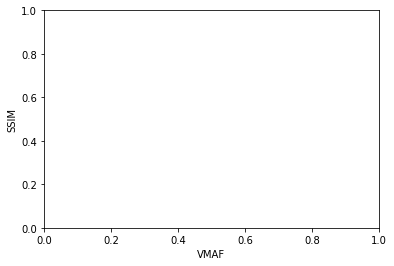

In [4]:
exec(open('run_MDTVSFA.py').read())
import os
import numpy as np
import matplotlib.pyplot as plt
log_dir_name = '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/'
AV_log_lst = [log_dir_name + i for i in sorted(os.listdir(log_dir_name))]
AV_log_options = {"log_name_raw" : [],
                 "log_name": [],
                 "func":[],
                 "metrics": [],
                 "AV_log":[]}
for AV_log_1 in AV_log_lst:
    #plt.figure(num = 3)
    #plt.figure(dpi = 300)
    AV_log = np.load(AV_log_1, allow_pickle = True)
    AV_log_options["AV_log"].append(AV_log)
    AV_log_options["log_name_raw" ].append(AV_log_1)
    dir_name_raw = AV_log_1.split('/')[-1]
    dir_name = "NSGA-II "
    if dir_name_raw.lower().count("vmaf") > 0:
        dir_name += "VMAF"
        plt.xlabel("VMAF")
        AV_log_options["metrics"].append("VMAF")
    else:
        dir_name += "MDTVSFA"
        plt.xlabel("MDTVSFA")
        AV_log_options["metrics"].append("MDTVSFA")
    dir_name += "+"
    if dir_name_raw.lower().count("vmaf") > 0 and dir_name_raw.lower().count("mdtvsfa") > 0:
        dir_name += "MDTVSFA"
        plt.xlabel("MDTVSFA")
        plt.ylabel("VMAF")
    elif dir_name_raw.lower().count("psnr") > 0:
        dir_name += "PSNR"
        plt.ylabel("PSNR")
    else:
        dir_name += "SSIM"
        plt.ylabel("SSIM")
    dir_name += " tuning, preprocessing: "
    for i,j,f in zip(["drago", "clahe","gamma"],
                     ["Tonemap Drago", "CLAHE", "gamma+unsharp masking"],
                     [tonemapDrago, expose_cv2, aug4const]):
        if dir_name_raw.lower().count(i) > 0:
            dir_name += j
            AV_log_options["func"].append(f)
            break
    AV_log_options["log_name"].append(dir_name)
    
    #plt.title(dir_name)

In [3]:

env_MDTVSFA = calc_met( model = "MDTVSFA", home_dir1=home_dir,dataset_dir=dst_dir)

In [4]:

#exec(open('run_VMAF.py').read())
#env_VMAF = calc_met( model = "vmaf_v063", home_dir1=home_dir,dataset_dir=dst_dir)

#env.func = axis_swaper(Identity)
#env.dataset_dir = dst_dir

bitrates = [1,2,4]
AV_LOG_bitrates = []
for AV, f, metrics in tqdm(zip(AV_log_options["AV_log"],
                          AV_log_options['func'],
                         AV_log_options['metrics'])):
    if metrics != "MDTVSFA":
        continue
    AV_log = []
    AV_log_M = []
    for bitrate in bitrates:
        
        AV_log_i = np.array([1,1,[],1])
        for AV_i, vid in tqdm(zip(AV, os.listdir(dst_dir))):
            AV_i = AV_i[2]
            for arg in tqdm(AV_i):
                arg = arg[0]
                if metrics == "VMAF":
                    env = env_VMAF
                    env.func = axis_swaper(f)
                else:
                    env = env_MDTVSFA
                    env.metr = env.MDTVSFA
                    env.func = f
                env.dataset = [vid]
                env.dataset_dir = dst_dir
                env.one_batch = True
                env.single_frame = False
                env.codec = " -vcodec libx264  -b:v " + str(bitrate) + "M "
                if metrics == "MDTVSFA":
                    env.init_video()#####PROXY IS NOT CHANGED
                target, proxy = env.get_metrix([arg])[0][0]
                AV_log_i[2].append([proxy, target])
        AV_log_i[2] = np.array(AV_log_i[2])
        AV_log.append(AV_log_i)
        AV_log_M.append(AV_log_i)
    [np.array([0,0,np.array(i[2]),0]) for i in AV_log_M]
    AV_log = np.mean(AV_log_M, axis = 0)
    AV_LOG_bitrates.append(AV_log)

0it [00:00, ?it/s]

<ipython-input-4-612cfa33836f>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  AV_log_i = np.array([1,1,[],1])


0it [00:00, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

RuntimeError: CUDA out of memory. Tried to allocate 64.00 MiB (GPU 0; 10.76 GiB total capacity; 5.59 GiB already allocated; 79.38 MiB free; 5.62 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [6]:
exec(open('run_VMAF.py').read())
env_VMAF = calc_met( model = "vmaf_v063", home_dir1=home_dir,dataset_dir=dst_dir)
env = env_VMAF
env.func = axis_swaper(Identity)
env.dataset_dir = dst_dir
bitrates = [1,2,4]
AV_LOG_bitrates = []
for AV, f, metrics in tqdm(zip(AV_log_options["AV_log"],
                          AV_log_options['func'],
                         AV_log_options['metrics'])):
    if metrics != "VMAF":
        continue
    AV_log = []
    AV_log_M = []
    for bitrate in bitrates:
        
        AV_log_i = np.array([1,1,[],1])
        for AV_i, vid in tqdm(zip(AV, os.listdir(dst_dir))):
            AV_i = AV_i[2]
            for arg in tqdm(AV_i):
                arg = arg[0]
                if metrics == "VMAF":
                    env = env_VMAF
                    env.func = axis_swaper(f)
                else:
                    env = env_MDTVSFA
                    env.metr = env.MDTVSFA
                    env.func = f
                env.dataset = [vid]
                env.dataset_dir = dst_dir
                env.one_batch = True
                env.single_frame = False
                env.codec = " -vcodec libx264  -b:v " + str(bitrate) + "M "
                if metrics == "MDTVSFA":
                    env.init_video()#####PROXY IS NOT CHANGED
                target, proxy = env.get_metrix([arg])[0][0]
                AV_log_i[2].append([proxy, target])
        AV_log_i[2] = np.array(AV_log_i[2])
        AV_log.append(AV_log_i)
        AV_log_M.append(AV_log_i)
    [np.array([0,0,np.array(i[2]),0]) for i in AV_log_M]
    AV_log = np.mean(AV_log_M, axis = 0)
    AV_LOG_bitrates.append(AV_log)

0it [00:00, ?it/s]

<ipython-input-6-0b90667db700>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  AV_log_i = np.array([1,1,[],1])


0it [00:00, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

<ipython-input-6-0b90667db700>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  AV_log_i = np.array([1,1,[],1])


0it [00:00, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

<ipython-input-6-0b90667db700>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  AV_log_i = np.array([1,1,[],1])


0it [00:00, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

<ipython-input-6-0b90667db700>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  [np.array([0,0,np.array(i[2]),0]) for i in AV_log_M]
<ipython-input-6-0b90667db700>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  AV_log_i = np.array([1,1,[],1])


0it [00:00, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

error: OpenCV(4.5.1) /tmp/pip-req-build-ms668fyv/opencv/modules/photo/src/tonemap.cpp:69: error: (-215:Assertion failed) _src.dims() == 2 && _src.type() == CV_32FC3 in function 'process'


In [7]:
#np.save("AV_LOG_bitrates_VMAF.npy", AV_LOG_bitrates)

In [15]:
np.array(AV_log_M)[0][1]

<ipython-input-15-f73f89ef86d0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(AV_log_M)[0][1]


1

In [62]:
AV = AV_log_options["AV_log"][0]    
AV = AV[3]
#AV[2]
AV[2][0]

array([[ 5.70244895, 13.78509816],
       [ 0.49359438, 15.4027177 ]])

In [ ]:
AV_log[0][2]


In [4]:
AV_log_options

{'log_name_raw': ['/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_PSNR_CLAHE.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_PSNR_Tonemap_Drago.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_PSNR_gamma_unsharp.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_SSIM_CLAHE.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_SSIM_Tonemap_Drago.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_SSIM_gamma_unsharp.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_VMAF_CLAHE.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_VMAF_Tonemap_Drago.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/MDTVSFA_VMAF_gamma_unsharp.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/VMAF_PSNR_CLAHE.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/VMAF_PSNR_Tonemap_Drago.npy',
  '/home/max/driveE/VMAF_METRIX/CVPR_NSGA_new/logs/VMAF_PSNR_gamma_unsharp.npy',
  '/home/max/driv